In [1]:
import pandas as pd

import seaborn as sns
import glob
from matplotlib import pyplot as plt

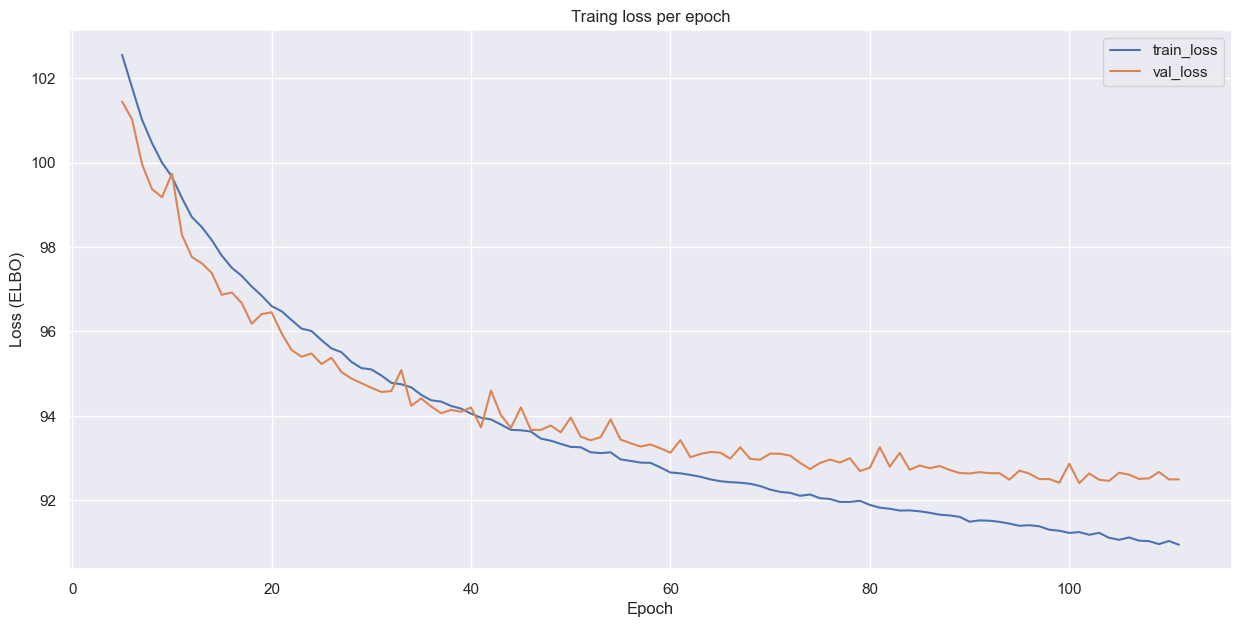

In [2]:
sns.set_theme()

df = pd.read_csv("../logs/aug/cnn/cnn_i_5_latent_0.2.csv").iloc[5:].loc[:, [ 'train_loss', 'val_loss']]

ax = df.plot(title='Traing loss per epoch', figsize=(15, 7))

# Add x and y labels
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (ELBO)')


plt.savefig('cnn_arch_overfitting.pdf')

In [3]:
df

,train_loss,val_loss
5,102.551737,101.443830
6,101.775384,101.023156
7,101.013835,99.962185
8,100.460700,99.371086
9,99.999466,99.178371
...,...,...
107,91.047797,92.510228
108,91.036753,92.521931
109,90.966572,92.673810
110,91.039176,92.497391


In [ ]:
train_loss, val_loss = {}, {}

for x in glob.glob("../logs/aug/cnn/*.csv"):
    # print(x)
    latent_factor = float(x.split("latent_")[1].split('.csv')[0])
    # print(latent_factor)
    i = float(x.split("i_")[1].split('_latent')[0])
    # print(i)

    df = pd.read_csv(x).iloc[-1]


    train_loss[(latent_factor, int(16*i))] = df.train_loss
    val_loss[(latent_factor, int(16*i))] = df.val_loss

df = pd.DataFrame({'train_loss': pd.Series(train_loss), 'val_loss': pd.Series(val_loss)}).sort_index(axis=0).sort_index(axis=1).loc[:, 'train_loss']

df = df.unstack()

df.index.name = 'latent_factor'
df.columns.name = '# filters 1st layer'


latex_code = df.T.to_latex(escape=False, multicolumn=True, multirow=True, float_format="%.2f")
print(latex_code)


In [ ]:
train_loss, val_loss = {}, {}

for x in glob.glob("../logs/aug/new_start_base/layers_*latent*.csv"):
    # print(x)
    latent_factor = float(x.split("latent_")[1].split('.csv')[0])
    n_layers = int(x.split('layers_')[1].split('_')[0]) - 1
    geo = x.split('/')[-1].split('_')[3].split('_')[0]
    df = pd.read_csv(x).iloc[-1]

    train_loss[(geo, n_layers, latent_factor)] = df.train_loss
    val_loss[(geo, n_layers, latent_factor)] = df.val_loss

df = pd.DataFrame({'train_loss': pd.Series(train_loss), 'val_loss': pd.Series(val_loss)}).sort_index(axis=0).sort_index(axis=1)
df.columns.name = 'metric'
df.index.names = ['geometry', 'n layers', 'latent factor']
df = df.unstack('latent factor').loc[:, 'train_loss']

output = df.sort_index(axis=0).sort_index(axis=1)
output

In [7]:
!ls ../logs/aug/cnn/snp/

cnn_0.0.csv     cnn_0.00025.csv cnn_0.0005.csv  cnn_0.001.csv   cnn_0.002.csv


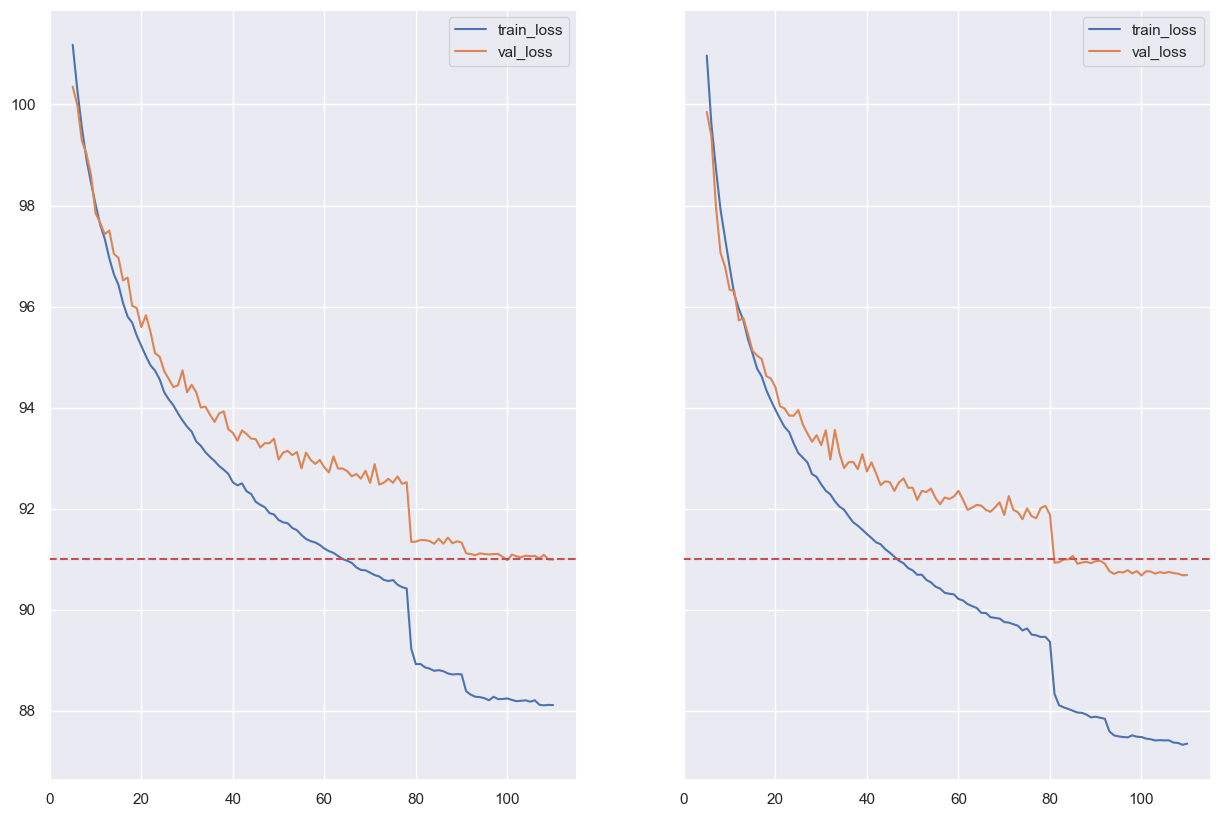

In [50]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 10))

pd.read_csv('../logs/aug/cnn/snp/cnn_0.0.csv').iloc[5:].loc[:, ['train_loss', 'val_loss']].plot(ax=ax[0])

pd.read_csv('../logs/aug/cnn/snp/spec.csv').iloc[5:].loc[:, ['train_loss', 'val_loss']].plot(ax=ax[1])

ax[0].axhline(y=91, color='r', linestyle='--') 
ax[1].axhline(y=91, color='r', linestyle='--')

In [36]:

pd.read_csv('../logs/aug/cnn/snp/cnn_0.0005.csv').val_loss.min()

92.09010517850837